# Load Data

In [1]:
import os
base_dataset = 'C:/Users/ASUS RYZEN/AnacondaJupyter/Skripsi/tuberculosis-tb-chest-xray-dataset/TB_Chest_Radiography_Database'
class_dir = ['Normal', 'Tuberculosis']
for class_item in class_dir:
  cur_dir = base_dataset+"/"+class_item
  
  dataset = os.listdir(cur_dir)
  for item in dataset:
    if not item.endswith(".png"):
        os.remove(os.path.join(cur_dir, item))

In [2]:
'''import splitfolders

base_dir="C:/Users/ASUS RYZEN/AnacondaJupyter/Skripsi/tuberculosis-tb-chest-xray-dataset/TB_Chest_Radiography_Database"
data_dir="C:/Users/ASUS RYZEN/AnacondaJupyter/Skripsi/fix_data_splitted"
splitfolders.ratio(base_dir, output=data_dir, seed=1337, ratio=(.8 ,.1 ,.1),group_prefix=None)'''

'import splitfolders\n\nbase_dir="C:/Users/ASUS RYZEN/AnacondaJupyter/Skripsi/tuberculosis-tb-chest-xray-dataset/TB_Chest_Radiography_Database"\ndata_dir="C:/Users/ASUS RYZEN/AnacondaJupyter/Skripsi/fix_data_splitted"\nsplitfolders.ratio(base_dir, output=data_dir, seed=1337, ratio=(.8 ,.1 ,.1),group_prefix=None)'

In [3]:
cd C:\Users\ASUS RYZEN\AnacondaJupyter\Skripsi\Model2_CNN

C:\Users\ASUS RYZEN\AnacondaJupyter\Skripsi\Model2_CNN


In [4]:
ls

 Volume in drive C is OS
 Volume Serial Number is 70B6-E30C

 Directory of C:\Users\ASUS RYZEN\AnacondaJupyter\Skripsi\Model2_CNN

11/10/2021  08:39 AM    <DIR>          .
11/10/2021  08:39 AM    <DIR>          ..
11/10/2021  08:19 AM    <DIR>          .ipynb_checkpoints
11/10/2021  08:39 AM           454,010 Untitled.ipynb
               1 File(s)        454,010 bytes
               3 Dir(s)  358,649,077,760 bytes free


In [5]:
dataset_awal ='C:/Users/ASUS RYZEN/AnacondaJupyter/Skripsi/tuberculosis-tb-chest-xray-dataset/TB_Chest_Radiography_Database'
#tot_data_noclean = paper+rock+scissors

print('Number of classes: {}'.format(len(os.listdir(dataset_awal))))
#print('Number of datas: {}'.format(tot_data_noclean))
print('')

normal = len(os.listdir(dataset_awal+'/Normal'))
tbc= len(os.listdir(dataset_awal+'/Tuberculosis'))

print("DATASET AWAL ")
print('Normal : ', normal)
print('TBC : ', tbc)




Number of classes: 5

DATASET AWAL 
Normal :  3500
TBC :  700


In [6]:
#Define a path
base_dir = 'C:/Users/ASUS RYZEN/AnacondaJupyter/Skripsi/fix_data_splitted'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

train_normal_dir = os.path.join(train_dir, 'Normal')
train_tuber_dir = os.path.join(train_dir, 'Tuberculosis')

validation_normal_dir = os.path.join(validation_dir, 'Normal')
validation_tuber_dir = os.path.join(validation_dir, 'Tuberculosis')

test_normal_dir = os.path.join(test_dir, 'Normal')
test_tuber_dir = os.path.join(test_dir, 'Tuberculosis')

In [7]:
print('Jumlah data train normal :', len(os.listdir(train_normal_dir)))
print('Jumlah data train tuber :',len(os.listdir(train_tuber_dir)))
print()
print('Jumlah data validation normal  :',len(os.listdir(validation_normal_dir)))
print('Jumlah data validation tuber :',len(os.listdir(validation_tuber_dir)))
print('')
print('Jumlah data test normal  :',len(os.listdir(test_normal_dir)))
print('Jumlah data test puber :',len(os.listdir(test_tuber_dir)))

Jumlah data train normal : 2800
Jumlah data train tuber : 560

Jumlah data validation normal  : 350
Jumlah data validation tuber : 70

Jumlah data test normal  : 350
Jumlah data test puber : 70


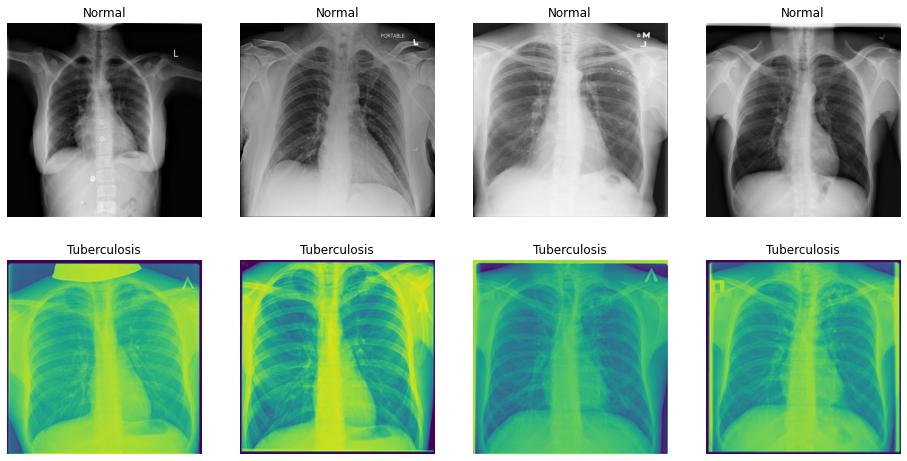

In [8]:
# Tampilkan 8 image per kelas dengan ukuran 4x4 

%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows = 2
ncols = 4

pic_index = 0

fig = plt.gcf()
fig.set_size_inches( ncols * 4,nrows * 4)

pic_index += 8
normal_img = [os.path.join(train_normal_dir, fname) 
                for fname in os.listdir(train_normal_dir)[pic_index-4:pic_index]]
tuberculosis_img  = [os.path.join(train_tuber_dir, fname) 
                for fname in os.listdir(train_tuber_dir)[pic_index-4:pic_index]]

for i, img_path in enumerate(normal_img+tuberculosis_img):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.title(img_path.split(os.path.sep)[-2])

plt.show()

# Preprocessing

In [9]:
cd C:\Users\ASUS RYZEN\AnacondaJupyter\Skripsi\Model2_CNN

C:\Users\ASUS RYZEN\AnacondaJupyter\Skripsi\Model2_CNN


In [10]:
ls

 Volume in drive C is OS
 Volume Serial Number is 70B6-E30C

 Directory of C:\Users\ASUS RYZEN\AnacondaJupyter\Skripsi\Model2_CNN

11/10/2021  08:39 AM    <DIR>          .
11/10/2021  08:39 AM    <DIR>          ..
11/10/2021  08:19 AM    <DIR>          .ipynb_checkpoints
11/10/2021  08:39 AM           454,010 Untitled.ipynb
               1 File(s)        454,010 bytes
               3 Dir(s)  358,648,926,208 bytes free


In [11]:
!pip3 install keras

In [12]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

In [32]:
height = 100
width = 100
batch_size = 32

In [ ]:

TRAINING_DIR = "C:/Users/ASUS RYZEN/AnacondaJupyter/Skripsi/fix_data_splitted/train"
VALIDATION_DIR = "C:/Users/ASUS RYZEN/AnacondaJupyter/Skripsi/fix_data_splitted/val"
TEST_DIR = "C:/Users/ASUS RYZEN/AnacondaJupyter/Skripsi/fix_data_splitted/test"

In [53]:
generator_datagen = ImageDataGenerator(
    rescale = 1./255,
    #rotation_range=40,
    #width_shift_range=0.2,
    #height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

val_gen = ImageDataGenerator(rescale = 1./255)


TRAINING_DIR = "C:/Users/ASUS RYZEN/AnacondaJupyter/Skripsi/fix_data_splitted/train"
VALIDATION_DIR = "C:/Users/ASUS RYZEN/AnacondaJupyter/Skripsi/fix_data_splitted/val"
TEST_DIR = "C:/Users/ASUS RYZEN/AnacondaJupyter/Skripsi/fix_data_splitted/test"

train_generator = generator_datagen.flow_from_directory(
    TRAINING_DIR,
    target_size=(height, width),
    class_mode='categorical',
    color_mode="rgb",
    shuffle=True,
    batch_size=batch_size
)

validation_generator = val_gen.flow_from_directory(
    VALIDATION_DIR,
    target_size=(height,width),
    class_mode='categorical',
    color_mode="rgb",
    shuffle=False,
    batch_size=batch_size
)

test_generator = val_gen.flow_from_directory(
    TEST_DIR,
    target_size=(height,width),
    class_mode='categorical',
    color_mode="rgb",
    shuffle=False,
    batch_size=batch_size
)

Found 3360 images belonging to 2 classes.
Found 420 images belonging to 2 classes.
Found 420 images belonging to 2 classes.


# Define Model CNN

In [54]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Conv2D, AveragePooling2D, Flatten, GlobalAveragePooling2D, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

from tensorflow.keras import layers

In [57]:
# DEFINISIKAN MODEL ANDA DISINI
model = Sequential()

model.add(InputLayer(input_shape=[100,100,3]))

model.add(Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(AveragePooling2D(pool_size=2, padding='same'))
model.add(Conv2D(filters=128, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(Dropout(0.25))

model.add(AveragePooling2D(pool_size=2, padding='same'))
model.add(Conv2D(filters=256, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(Dropout(0.25))

model.add(AveragePooling2D(pool_size=2, padding='same'))
model.add(Conv2D(filters=256, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(Dropout(0.25))


model.add(AveragePooling2D(pool_size=2, padding='same'))
model.add(GlobalAveragePooling2D())
model.add(Flatten())


# Fully Connected Layer
model.add(Dense(1024, activation='relu'))
model.add(BatchNormalization()),
model.add(Dropout(0.4))

model.add(Dense(1024, activation='relu'))
model.add(BatchNormalization()),
model.add(Dropout(0.4))
model.add(Dense(2, activation='sigmoid'))

print(model.summary())

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_40 (Conv2D)           (None, 100, 100, 64)      1792      
_________________________________________________________________
average_pooling2d_36 (Averag (None, 50, 50, 64)        0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 50, 50, 128)       73856     
_________________________________________________________________
dropout_45 (Dropout)         (None, 50, 50, 128)       0         
_________________________________________________________________
average_pooling2d_37 (Averag (None, 25, 25, 128)       0         
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 25, 25, 256)       295168    
_________________________________________________________________
dropout_46 (Dropout)         (None, 25, 25, 256)     

In [58]:
model.compile(loss='categorical_crossentropy',
             optimizer=Adam(lr=0.001),
             metrics='acc')


In [59]:
H = model.fit(train_generator, steps_per_epoch=10, epochs=100, validation_data = validation_generator)

Epoch 1/100
10/10 [==============================] - 31s 3s/step - loss: 1.4824 - acc: 0.5530 - val_loss: 0.5763 - val_acc: 0.8333
Epoch 2/100
10/10 [==============================] - 25s 3s/step - loss: 0.8733 - acc: 0.6734 - val_loss: 0.4696 - val_acc: 0.8333
Epoch 3/100
10/10 [==============================] - 25s 2s/step - loss: 0.5824 - acc: 0.8218 - val_loss: 0.4266 - val_acc: 0.8333
Epoch 4/100
10/10 [==============================] - 24s 2s/step - loss: 0.3551 - acc: 0.8705 - val_loss: 0.3808 - val_acc: 0.8333
Epoch 5/100
10/10 [==============================] - 30s 3s/step - loss: 0.4243 - acc: 0.8958 - val_loss: 0.4471 - val_acc: 0.8333
Epoch 6/100
10/10 [==============================] - 25s 3s/step - loss: 0.3647 - acc: 0.8818 - val_loss: 0.3816 - val_acc: 0.8452
Epoch 7/100
10/10 [==============================] - 25s 2s/step - loss: 0.4181 - acc: 0.8750 - val_loss: 0.3733 - val_acc: 0.8357
Epoch 8/100
10/10 [==============================] - 24s 2s/step - loss: 0.5236 - a

10/10 [==============================] - 24s 2s/step - loss: 0.2542 - acc: 0.9026 - val_loss: 2.1166 - val_acc: 0.8833
Epoch 64/100
10/10 [==============================] - 24s 2s/step - loss: 0.2221 - acc: 0.9206 - val_loss: 1.4664 - val_acc: 0.8690
Epoch 65/100
10/10 [==============================] - 24s 2s/step - loss: 0.2267 - acc: 0.9044 - val_loss: 0.5821 - val_acc: 0.8833
Epoch 66/100
10/10 [==============================] - 24s 2s/step - loss: 0.1571 - acc: 0.9535 - val_loss: 0.9895 - val_acc: 0.3762
Epoch 67/100
10/10 [==============================] - 24s 2s/step - loss: 0.2619 - acc: 0.9035 - val_loss: 4.9820 - val_acc: 0.8500
Epoch 68/100
10/10 [==============================] - 24s 2s/step - loss: 0.2100 - acc: 0.9301 - val_loss: 2.6245 - val_acc: 0.8810
Epoch 69/100
10/10 [==============================] - 25s 3s/step - loss: 0.2917 - acc: 0.8805 - val_loss: 0.2704 - val_acc: 0.9024
Epoch 70/100
10/10 [==============================] - 24s 2s/step - loss: 0.2577 - acc: 0

# Result

In [60]:
#Print the Target names
target_names = []
for key in train_generator.class_indices:
    target_names.append(key)
print(target_names)

['Normal', 'Tuberculosis']


In [62]:
#Saved Model
model.save('C:/Users/ASUS RYZEN/AnacondaJupyter/Skripsi/Model2_CNN/BatchNormModel.h5')
model.save('C:/Users/ASUS RYZEN/AnacondaJupyter/Skripsi/Model2_CNN/DropoutModel.h5')

## Plotting

In [63]:
!pip3 install numpy
import numpy as np

In [65]:
'''#Get the accuracy score
test_score = model.evaluate_generator(test_generator, batch_size)

print("[INFO] accuracy: {:.2f}%".format(test_score[1] * 100)) 

print("[INFO] Loss: ",test_score[0])'''

'#Get the accuracy score\ntest_score = model.evaluate_generator(test_generator, batch_size)\n\nprint("[INFO] accuracy: {:.2f}%".format(test_score[1] * 100)) \n\nprint("[INFO] Loss: ",test_score[0])'

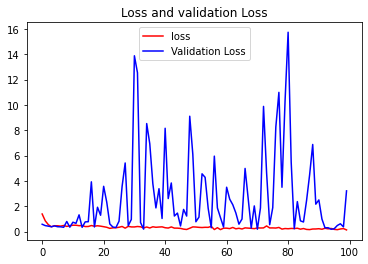

<Figure size 432x288 with 0 Axes>

In [66]:
import matplotlib.pyplot as plt
loss = H.history['loss']
val_loss = H.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='loss ')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Loss and validation Loss')
plt.legend(loc=0)
plt.figure()


plt.show()

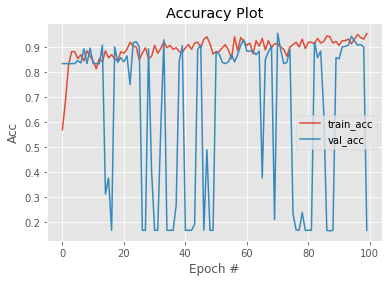

In [67]:
#Acc
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 100), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, 100), H.history["val_acc"], label="val_acc")
plt.title("Accuracy Plot")
plt.xlabel("Epoch #")
plt.ylabel("Acc")
plt.legend()
plt.show()

## Prediction

In [68]:
from sklearn.metrics import classification_report

Y_pred = model.predict_generator(test_generator)
y_pred = np.argmax(Y_pred, axis=1)

print('Classification Report')
print(classification_report(test_generator.classes, y_pred, target_names=target_names))

C:\Users\ASUS RYZEN\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Classification Report
              precision    recall  f1-score   support

      Normal       0.00      0.00      0.00       350
Tuberculosis       0.17      1.00      0.29        70

    accuracy                           0.17       420
   macro avg       0.08      0.50      0.14       420
weighted avg       0.03      0.17      0.05       420



C:\Users\ASUS RYZEN\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Confusion_Matrix

In [69]:
from sklearn.metrics import  confusion_matrix
import itertools 
import seaborn as sns

In [70]:
#Print the Target names
target_names = []
for key in train_generator.class_indices:
    target_names.append(key)
print(target_names)

['Normal', 'Tuberculosis']


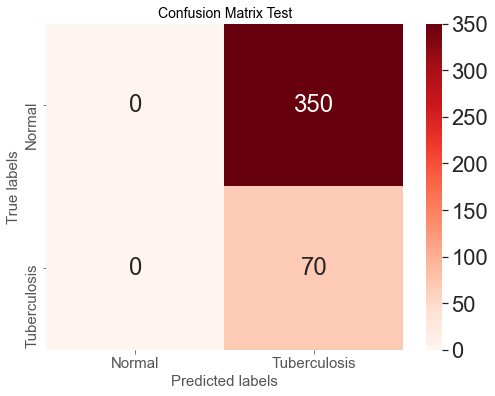

In [71]:
Cmatrix_test = confusion_matrix(test_generator.classes, y_pred)
class_names = test_generator.class_indices

plt.figure(figsize = (8,6))
ax = plt.subplot()
sns.set(font_scale=2.0) # Adjust to fit
sns.heatmap(Cmatrix_test,annot=True, fmt='',ax=ax, cmap=plt.cm.Reds)

# labels, title and ticks
label_font = {'size':'15'}  # Adjust to fit
ax.set_xlabel('Predicted labels', fontdict=label_font)
ax.set_ylabel('True labels', fontdict=label_font) 

title_font = {'size':'18'}  # Adjust to fit
ax.set_title('Confusion Matrix', fontdict=title_font)

ax.tick_params(axis='both', which='major', labelsize=15)  # Adjust to fit
ax.xaxis.set_ticklabels(class_names)   
ax.yaxis.set_ticklabels(class_names)
plt.title('Confusion Matrix Test',fontsize=14)
plt.show()

## Make prediction

In [72]:
!pip3 install opencv-python

In [75]:
import cv2
from tensorflow.keras.models import  load_model
img_upl = cv2.imread('C:/Users/ASUS RYZEN/AnacondaJupyter/Skripsi/fix_data_splitted/test/Normal/Normal-397.png')

img = np.array(img_upl)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

model_list = ['C:/Users/ASUS RYZEN/AnacondaJupyter/Skripsi/Model2_CNN/BatchNormModel.h5',
              'C:/Users/ASUS RYZEN/AnacondaJupyter/Skripsi/Model2_CNN/DropoutModel.h5']
labels = ['Tuberculosis', 'Normal']


for m in model_list:
    model = load_model(m)
    size_img = model.layers[0].output_shape[1:3]
    imgs = cv2.resize(img, size_img)
    imgs = imgs.astype('float32') / 255
    pred = model.predict(np.expand_dims(imgs, axis=0))[0]
    print('Model :', m.split('/')[-1])
    print('Predicted Label :',labels[((pred > 0.5)+0).ravel()[0]])
    print('Probability :',[ round(elem, 4) for elem in pred ][0])
    print('===============\n')

Model : BatchNormModel.h5
Predicted Label : Normal
Probability : 0.5182

Model : DropoutModel.h5
Predicted Label : Normal
Probability : 0.5182



In [76]:
#Load model dlu
#import json
from tensorflow.keras.models import load_model

target_dir = 'C:/Users/ASUS RYZEN/AnacondaJupyter/Skripsi/Model2_CNN'
#history = json.load(open(target_dir + '/history_model_cnn_augmented.json', 'r'))
model_saved = load_model(target_dir + '/BatchNormModel.h5')

In [77]:
normal_name_dir = [os.path.join(test_normal_dir, fname) for fname in os.listdir(test_normal_dir)[0:5]]
tbc_name_dir = [os.path.join(test_tuber_dir, fname) for fname in os.listdir(test_tuber_dir)[:5]]


normal_tbc_dir = normal_name_dir + tbc_name_dir

In [80]:
import time
#from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
#img_path = 'C:/Users/ASUS RYZEN/AnacondaJupyter/ML_Praktikum/Modul3/rockpaperscissors/rps-cv-images'
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

def pred_img(img_path):
    img = load_img(img_path, target_size=(100,150))
    img = img_to_array(img)
    img = np.expand_dims(img, axis=0)

    start_pred_time = time.time()

    pred_result = model_saved.predict(img)
    #print(pred_result)
    
    end_pred_time = time.time()

    pred_value = np.argmax(pred_result)
    #print(pred_value)
    #pred_label = list(label_dict.keys())[list(label_dict.values()).index(pred_value)]
    pred_label = 'Normal' if pred_value == 0 else 'Tuberculosis' 
    confidence_percent = np.max(pred_result) * 100
    pred_time = end_pred_time - start_pred_time

    return pred_label, confidence_percent, pred_time

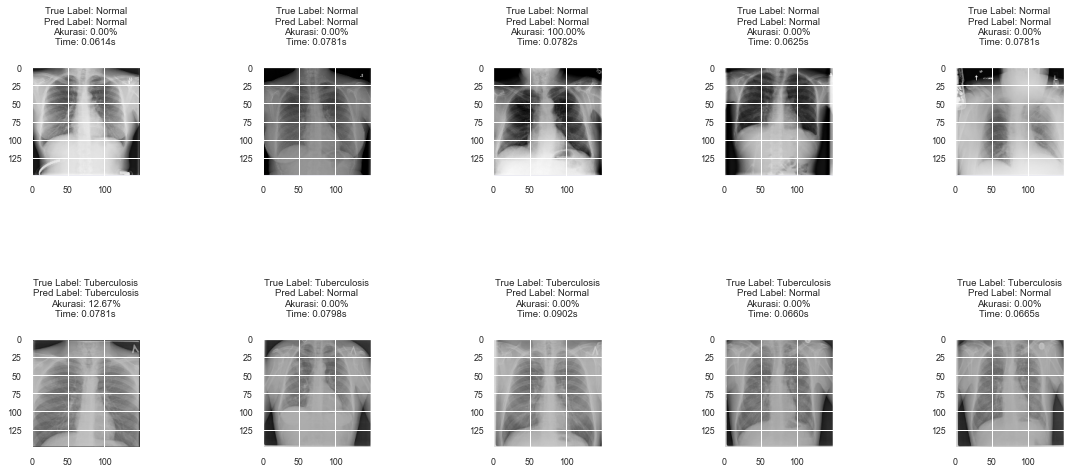

In [82]:
import cv2
nrows = 3
ncols = 5

fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

for i, img_path in enumerate(normal_tbc_dir):
    sns.set(font_scale=0.8)
    plt.subplot(nrows, ncols, i + 1)
    plt.subplots_adjust(hspace=1.5)

    img = cv2.imread(img_path)
    img = cv2.resize(img, (150,150))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    true_label = img_path.split(os.path.sep)[-2]
    pred_result = pred_img(img_path)
    pred_label = pred_result[0]
    confidence_percent = pred_result[1]
    pred_time = pred_result[2]

    plt.title(f"True Label: {true_label}\nPred Label: {pred_label}\nAkurasi: {confidence_percent:.2f}%\nTime: {pred_time:.4f}s", y=1.15)
    plt.imshow(img)

plt.show()